Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO.7** | **Performing Face Recognition**
**Name** | Dela Cruz, Eugene
**Section** | CPE32S3
**Date Performed**: | 2/21/25
**Date Submitted**: |
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

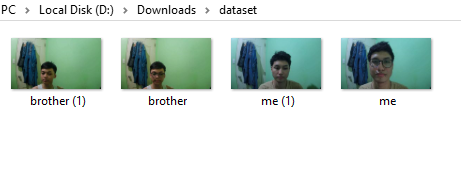

---

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [112]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]
dataset = read_images("D:/Downloads/dataset")
print(dataset)

[[array([[222, 222, 223, ..., 169, 170, 170],
       [222, 222, 222, ..., 165, 165, 165],
       [221, 221, 222, ..., 161, 162, 162],
       ...,
       [118, 119, 120, ...,  16,  20,  21],
       [118, 119, 120, ...,  21,  18,  14],
       [118, 119, 120, ...,  24,  17,  10]], dtype=uint8), array([[229, 229, 229, ..., 168, 174, 181],
       [224, 225, 225, ..., 155, 162, 169],
       [221, 221, 221, ..., 152, 158, 165],
       ...,
       [123, 123, 124, ...,  28,  25,  18],
       [120, 120, 121, ...,  25,  19,  10],
       [115, 116, 117, ...,  21,  12,   3]], dtype=uint8), array([[228, 228, 229, ..., 160, 165, 171],
       [224, 224, 225, ..., 156, 162, 168],
       [221, 221, 221, ..., 154, 160, 167],
       ...,
       [125, 125, 125, ...,  21,  18,  22],
       [125, 125, 125, ...,  24,  25,  38],
       [125, 125, 125, ...,   8,  15,  37]], dtype=uint8), array([[222, 222, 222, ..., 166, 169, 173],
       [222, 222, 222, ..., 154, 157, 161],
       [222, 222, 222, ..., 151, 154,

**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**

I experienced unexpected errors because of the dataset, files may be inaccessible so I organized the directory by adding folder and renaming the images. In addition, I also noticed that it resizes the images.

---

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

In [51]:
def face_rec():
  names = ['me', 'brother'] # Put your names here for faces to recognize

  [X, y] = read_images("D:/Downloads/dataset", (200,200)) # changed the path to the dataset
  if len(X) == 0 or len(y) == 0:
    print("No training data found. Please check the dataset path.")
    return

  y = np.asarray(y, dtype=np.int32)

  model = cv2.face.EigenFaceRecognizer_create()
  model.train(X, y)

  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier('D:/Downloads/haarcascade_frontalface_default.xml')

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label = names[params[0]]
        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**

The sample code uses OpenCV for image processing and Face_rec for face recognition, utilizing names to identify faces. I encountered a problem related to the dataset directory, which I troubleshot as mentioned in the first question. Additionally, I faced an issue where the camera recognized both models as "me."

---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.createFisherFaceRecognizer()`
- `model = cv2.face.createLBPHFaceRecognizer()`

In [76]:
def face_rec():
    names = ['me', 'brother']  # Update with actual names

    [X, y] = read_images("D:/Downloads/dataset", (200, 200))
    if len(X) == 0 or len(y) == 0:
        print("No training data found. Please check the dataset path.")
        return

    y = np.asarray(y, dtype=np.int32)

    # Use FisherFaceRecognizer
    model = cv2.face.FisherFaceRecognizer_create()
    model.train(X, y)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier('D:/Downloads/haarcascade_frontalface_default.xml')

    while True:
        ret, img = camera.read()
        if not ret:
            break

        faces = face_cascade.detectMultiScale(img, 1.3, 5)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
            roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                params = model.predict(roi)
                label = names[params[0]] if params[0] < len(names) else "Unknown"
                confidence = params[1]
                cv2.putText(img, f"{label}, {confidence:.2f}", (x, y - 20), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
                print(f"Detected: {label}, Confidence: {confidence:.2f}")
            except:
                continue

        cv2.imshow("camera", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

Detected: me, Confidence: 1599.23
Detected: me, Confidence: 1166.68
Detected: me, Confidence: 1166.68
Detected: me, Confidence: 725.30
Detected: me, Confidence: 856.23
Detected: me, Confidence: 847.44
Detected: me, Confidence: 664.58
Detected: me, Confidence: 758.61
Detected: me, Confidence: 913.06
Detected: me, Confidence: 913.06
Detected: me, Confidence: 841.10
Detected: me, Confidence: 773.14
Detected: me, Confidence: 773.88
Detected: me, Confidence: 708.66
Detected: me, Confidence: 708.66
Detected: me, Confidence: 648.04
Detected: me, Confidence: 806.60
Detected: me, Confidence: 765.31
Detected: me, Confidence: 995.18
Detected: me, Confidence: 718.36
Detected: me, Confidence: 2631.51
Detected: me, Confidence: 800.71
Detected: me, Confidence: 627.73
Detected: me, Confidence: 760.82
Detected: me, Confidence: 760.82
Detected: me, Confidence: 62.59
Detected: me, Confidence: 696.02
Detected: me, Confidence: 656.64
Detected: me, Confidence: 839.78
Detected: me, Confidence: 790.14
Detecte

In [74]:
def face_rec():
    names = ['me', 'brother']  # Update with actual names

    [X, y] = dataset
    if len(X) == 0 or len(y) == 0:
        print("No training data found. Please check the dataset path.")
        return

    y = np.asarray(y, dtype=np.int32)

    # Use LBPHFaceRecognizer
    model = cv2.face.LBPHFaceRecognizer_create()
    model.train(X, y)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier('D:/Downloads/haarcascade_frontalface_default.xml')

    while True:
        ret, img = camera.read()
        if not ret:
            break

        faces = face_cascade.detectMultiScale(img, 1.3, 5)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
            roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                params = model.predict(roi)
                label = names[params[0]] if params[0] < len(names) else "Unknown"
                confidence = params[1]
                cv2.putText(img, f"{label}, {confidence:.2f}", (x, y - 20), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
                print(f"Detected: {label}, Confidence: {confidence:.2f}")
            except:
                continue

        cv2.imshow("camera", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

Detected: me, Confidence: 111.92
Detected: me, Confidence: 111.92
Detected: me, Confidence: 109.83
Detected: me, Confidence: 108.52
Detected: me, Confidence: 105.77
Detected: me, Confidence: 110.38
Detected: me, Confidence: 110.38
Detected: me, Confidence: 111.25
Detected: me, Confidence: 113.87
Detected: me, Confidence: 111.53
Detected: me, Confidence: 108.53
Detected: me, Confidence: 110.50
Detected: me, Confidence: 111.14
Detected: me, Confidence: 111.14
Detected: me, Confidence: 111.22
Detected: me, Confidence: 109.11
Detected: me, Confidence: 108.51
Detected: me, Confidence: 111.89
Detected: me, Confidence: 111.89
Detected: me, Confidence: 112.26
Detected: me, Confidence: 113.27
Detected: me, Confidence: 113.52
Detected: me, Confidence: 108.23
Detected: me, Confidence: 108.16
Detected: me, Confidence: 112.33
Detected: me, Confidence: 112.33
Detected: me, Confidence: 112.13
Detected: me, Confidence: 113.16
Detected: me, Confidence: 113.48
Detected: me, Confidence: 113.89
Detected: 

**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important ince this application.**

The label represents the index of the recognized person from the training dataset, which is then mapped to a corresponding name for display. This allows the system to provide meaningful identification feedback. The confidence score, on the other hand, measures the model’s certainty in its prediction, with lower values indicating higher confidence. The label ensures accurate identification by mapping predictions to names, while the confidence score filters out unreliable results, reducing misidentifications.

## 4. Supplementary Activity

Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:
1. Create a new dataset for testing, this dataset must include the following:
  - The same person/s that the model has to recognize.
  - Different person/s that the model should not recognize.
2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.

Eigenface Recognition


In [125]:
def face_rec():
    names = ['me']  #known faces from dataset
    unknown_label = "unknown"
    confidence_threshold = 6300

    # Load dataset
    X, y = read_images("D:/Downloads/dataset", (200, 200))
    if len(X) == 0 or len(y) == 0:
        print("No training data found. Please check the dataset path.")
        return

    y = np.asarray(y, dtype=np.int32)

    # Train EigenFaceRecognizer
    model = cv2.face.EigenFaceRecognizer_create()
    model.train(X, y)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier('D:/Downloads/haarcascade_frontalface_default.xml')

    while True:
        ret, img = camera.read()
        if not ret:
            break

        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
            roi = gray_img[y:y + h, x:x + w]
            roi = cv2.resize(roi, (200, 200), interpolation=cv2.INTER_LINEAR)

            # Apply histogram equalization to improve accuracy
            roi = cv2.equalizeHist(roi)

            try:
                label, confidence = model.predict(roi)

                if confidence > confidence_threshold:
                    label_text = unknown_label
                else:
                    label_text = names[label] if label < len(names) else unknown_label

                print(f"Detected: {label_text}, Confidence: {confidence:.2f}")

                cv2.putText(img, f"{label_text}, {confidence:.2f}", (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

            except Exception as e:
                print("Prediction error:", e)
                continue

        cv2.imshow("Face Recognition", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

Detected: me, Confidence: 5905.93
Detected: me, Confidence: 5905.93
Detected: me, Confidence: 5925.65
Detected: me, Confidence: 5925.65
Detected: me, Confidence: 5900.68
Detected: me, Confidence: 5941.03
Detected: me, Confidence: 5936.92
Detected: me, Confidence: 5942.30
Detected: me, Confidence: 5942.30
Detected: me, Confidence: 6031.15
Detected: me, Confidence: 5922.38
Detected: me, Confidence: 5933.47
Detected: me, Confidence: 6108.11
Detected: me, Confidence: 6108.11
Detected: me, Confidence: 6175.79
Detected: me, Confidence: 6167.61
Detected: me, Confidence: 6024.22
Detected: me, Confidence: 6131.06
Detected: me, Confidence: 5902.29
Detected: me, Confidence: 6040.85
Detected: me, Confidence: 6040.85
Detected: me, Confidence: 6118.85
Detected: me, Confidence: 5944.53
Detected: me, Confidence: 5736.41
Detected: me, Confidence: 5896.31
Detected: me, Confidence: 5896.31
Detected: me, Confidence: 6185.61
Detected: me, Confidence: 6168.02
Detected: unknown, Confidence: 6578.05
Detected:

Fisherface Recognition

In [126]:
def face_rec():
    names = ['me']  #known faces from dataset
    unknown_label = "unknown"
    confidence_threshold = 6300

    # Load dataset
    X, y = read_images("D:/Downloads/dataset", (200, 200))
    if len(X) == 0 or len(y) == 0:
        print("No training data found. Please check the dataset path.")
        return

    y = np.asarray(y, dtype=np.int32)

    # Train FisherFaceRecognizer
    model = cv2.face.FisherFaceRecognizer_create()
    model.train(X, y)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier('D:/Downloads/haarcascade_frontalface_default.xml')

    while True:
        ret, img = camera.read()
        if not ret:
            break

        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
            roi = gray_img[y:y + h, x:x + w]
            roi = cv2.resize(roi, (200, 200), interpolation=cv2.INTER_LINEAR)

            # Apply histogram equalization to improve accuracy
            roi = cv2.equalizeHist(roi)

            try:
                label, confidence = model.predict(roi)

                if confidence > confidence_threshold:
                    label_text = unknown_label
                else:
                    label_text = names[label] if label < len(names) else unknown_label

                print(f"Detected: {label_text}, Confidence: {confidence:.2f}")

                cv2.putText(img, f"{label_text}, {confidence:.2f}", (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

            except Exception as e:
                print("Prediction error:", e)
                continue

        cv2.imshow("Face Recognition", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

Detected: me, Confidence: 2310.04
Detected: me, Confidence: 2145.08
Detected: me, Confidence: 2058.11
Detected: me, Confidence: 1572.94
Detected: me, Confidence: 1671.87
Detected: me, Confidence: 1419.19
Detected: me, Confidence: 1312.67
Detected: me, Confidence: 1312.67
Detected: me, Confidence: 399.37
Detected: me, Confidence: 827.83
Detected: me, Confidence: 424.73
Detected: me, Confidence: 812.75
Detected: me, Confidence: 812.75
Detected: me, Confidence: 960.66
Detected: me, Confidence: 575.19
Detected: me, Confidence: 1177.04
Detected: me, Confidence: 259.13
Detected: me, Confidence: 1873.93
Detected: me, Confidence: 1723.16
Detected: me, Confidence: 2110.02
Detected: me, Confidence: 1779.72
Detected: me, Confidence: 1777.07
Detected: me, Confidence: 1209.72
Detected: me, Confidence: 2004.43
Detected: me, Confidence: 1963.88
Detected: me, Confidence: 1963.88
Detected: me, Confidence: 1535.55
Detected: me, Confidence: 1270.03
Detected: me, Confidence: 1584.10
Detected: me, Confiden

Local Binary Pattern Histograms (LBPH) Recognition

In [127]:
def face_rec():
    names = ['me']  # known face
    unknown_label = "unknown"
    confidence_threshold = 110

    # Load dataset
    X, y = read_images("D:/Downloads/dataset", (200, 200))
    if len(X) == 0 or len(y) == 0:
        print("No training data found. Please check the dataset path.")
        return

    y = np.asarray(y, dtype=np.int32)

    # Use LBPHFaceRecognizer
    model = cv2.face.LBPHFaceRecognizer_create()
    model.train(X, y)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier('D:/Downloads/haarcascade_frontalface_default.xml')

    while True:
        ret, img = camera.read()
        if not ret:
            break

        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
            roi = gray_img[y:y + h, x:x + w]
            roi = cv2.resize(roi, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                label, confidence = model.predict(roi)

                if confidence > confidence_threshold:
                    label_text = unknown_label
                else:
                    label_text = names[label] if label < len(names) else unknown_label

                print(f"Detected: {label_text}, Confidence: {confidence:.2f}")

                cv2.putText(img, f"{label_text}, {confidence:.2f}", (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

            except Exception as e:
                print("Prediction error:", e)
                continue

        cv2.imshow("Face Recognition", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

Detected: me, Confidence: 106.84
Detected: unknown, Confidence: 110.16
Detected: me, Confidence: 109.92
Detected: me, Confidence: 109.38
Detected: me, Confidence: 109.38
Detected: unknown, Confidence: 110.10
Detected: me, Confidence: 109.34
Detected: me, Confidence: 108.12
Detected: me, Confidence: 107.48
Detected: me, Confidence: 107.48
Detected: me, Confidence: 108.51
Detected: me, Confidence: 103.86
Detected: me, Confidence: 104.75
Detected: me, Confidence: 105.42
Detected: me, Confidence: 104.27
Detected: me, Confidence: 102.30
Detected: me, Confidence: 102.30
Detected: me, Confidence: 101.45
Detected: me, Confidence: 104.90
Detected: me, Confidence: 103.57
Detected: unknown, Confidence: 115.66
Detected: unknown, Confidence: 115.66
Detected: me, Confidence: 108.21
Detected: me, Confidence: 106.10
Detected: unknown, Confidence: 110.50
Detected: me, Confidence: 105.72
Detected: me, Confidence: 105.85
Detected: me, Confidence: 103.70
Detected: me, Confidence: 103.70
Detected: unknown,

## 5. Summary, Conclusions and Lessons Learned

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*